# 1. Import All Packages

In [1]:
pip install Levenshtein pgmpy minepy ppscore cudf dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 31.2 MB/s eta 0:00:00
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187043 sha256=009a40203f9fca3d18244f0ab25388a8140590613c2c34fd806634c6d00965a3
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=1db3ccb7d669416a213c05db0d1b5d98397c9201

In [2]:
pip install Levenshtein pgmpy minepy ppscore

  Using cached levenshtein-0.27.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
  Using cached pgmpy-1.0.0-py3-none-any.whl.metadata (9.4 kB)
  Using cached minepy-1.2.6-cp310-cp310-linux_x86_64.whl
  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached rapidfuzz-3.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached pyro_ppl-1.9.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pyro_api-0.1.2-py3-none-any.whl.metadata (2.5 kB)
Using cached levenshtein-0.27.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (161 kB)
Using cached pgmpy-1.0.0-py3-none-any.whl (2.0 MB)
Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached rapidfuzz-3.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Using cached pyro_ppl-1.9.1-py3-no

In [3]:
import os
import random
import warnings
import networkx as nx
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, roc_curve
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2


import seaborn as sns
import matplotlib.pyplot as plt


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from minepy import MINE  # For MIC (Maximum Information Coefficient)
import ppscore as pps  # For Predictive Power Score (PPS)

import re
from itertools import combinations
import Levenshtein
from collections import defaultdict
from scipy.interpolate import LSQUnivariateSpline
from scipy.io import arff
from concurrent.futures import ThreadPoolExecutor, as_completed

from scipy.stats import boxcox
from scipy.stats import spearmanr, pearsonr

import pgmpy.estimators as ests
from pgmpy.estimators import TreeSearch
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import structure_score 
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination


import logging
import warnings
warnings.filterwarnings('ignore')

# 2. Load The Raw Data

In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')

# 3. Basic Dataset Information

* For Feature Extraction and Generation Purposes (Will Re-Write)

In [5]:
data = pd.concat([df_train, df_test], ignore_index=True)
data.head()

id     Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
0   0  Mystery Matters    Episode 98                     NaN  True Crime   
1   1    Joke Junction    Episode 26                  119.80      Comedy   
2   2   Study Sessions    Episode 16                   73.90   Education   
3   3   Digital Digest    Episode 45                   67.17  Technology   
4   4      Mind & Body    Episode 86                  110.51      Health   

   Host_Popularity_percentage Publication_Day Publication_Time  \
0                       74.81        Thursday            Night   
1                       66.95        Saturday        Afternoon   
2                       69.97         Tuesday          Evening   
3                       57.22          Monday          Morning   
4                       80.07          Monday        Afternoon   

   Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
0                          NaN            0.0          Positive   
1                        75.95            2.0          Negative   
2                         8.97            0.0          Negative   
3                        78.70            2.0          Positive   
4                        58.68            3.0           Neutral   

   Listening_Time_minutes  
0                31.41998  
1                88.01241  
2                44.92531  
3                46.27824  
4                75.61031

 * Note: Filling Number Of Ads Row with the Median : [Since Very Few Missing: 1 in train]

In [6]:
data['Number_of_Ads'] = data['Number_of_Ads'].fillna(data['Number_of_Ads'].median())

* Column Definitions

In [7]:
Target_Col = ['Listening_Time_minutes']
Identifier_Cols = ['id']
X_Cols = ['Podcast_Name', 'Genre',
          'Episode_Title', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment',
          'Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage','Number_of_Ads']

## 3. a. Helper Functions

* Adding some general helper functions for fetchinf dataset information, will add more to this section.

In [8]:
def intersection_of_lists(list1, list2):
    return list(set(list1) & set(list2))


def difference_of_lists(list1, list2):
    return [item for item in list1 if item not in list2]


def remove_single_unique_or_all_nans(df):
    removed_columns = []
    for column in df.columns:
        if df[column].nunique() <= 1 or df[column].isna().all():
            removed_columns.append(column)
            df = df.drop(columns=[column])
    print(f"Removed columns due to all NaN or only 1 unique value: {removed_columns}")
    return df


def columns_with_missing_values(df):
    missing_cols = [col for col in df.columns if df[col].isna().values.any()]
    print(f"Missing data columns: {missing_cols}")
    return missing_cols


def columns_with_more_than_X_percent_unique(df, colNames, perc):
    total_rows = len(df)
    threshold = total_rows * 0.01 * perc  
    cols_with_high_uniques = [col for col in colNames if df[col].nunique() > threshold]
    print(f"Columns with high uniques , >= {perc} %  of number of rows in the data: {cols_with_high_uniques}")
    return cols_with_high_uniques


def get_numeric_and_non_numeric_columns(df):
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
        print(f"Numeric columns: {numeric_cols}")
        print(f"Non-numeric columns: {non_numeric_cols}")
        return numeric_cols, non_numeric_cols

* Basic Informationon the Podcast Time Dataset

In [9]:
Numeric_Cols, Non_Numeric_Cols = get_numeric_and_non_numeric_columns(data[X_Cols])
MissingData_Cols = columns_with_missing_values(data[X_Cols])
GreaterThanTENpercUniQ_Cols = columns_with_more_than_X_percent_unique(data, Numeric_Cols, 75)
GreaterThanEIGHTpercUniQ_Cols = columns_with_more_than_X_percent_unique(data, Numeric_Cols, 50)
GreaterThanFIVEpercUniQ_Cols = columns_with_more_than_X_percent_unique(data, Numeric_Cols, 25)
GreaterThanONEpercUniQ_Cols = columns_with_more_than_X_percent_unique(data, Numeric_Cols, 1)
LessUniqueNA_Cols = intersection_of_lists(MissingData_Cols, difference_of_lists(GreaterThanONEpercUniQ_Cols, GreaterThanFIVEpercUniQ_Cols))

Numeric columns: ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
Non-numeric columns: ['Podcast_Name', 'Genre', 'Episode_Title', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
Missing data columns: ['Episode_Length_minutes', 'Guest_Popularity_percentage']
Columns with high uniques , >= 75 %  of number of rows in the data: []
Columns with high uniques , >= 50 %  of number of rows in the data: []
Columns with high uniques , >= 25 %  of number of rows in the data: []
Columns with high uniques , >= 1 %  of number of rows in the data: ['Episode_Length_minutes', 'Guest_Popularity_percentage']


# 4. Feature Engineering

* First Step must be EDA. But for the sake of a quick submission we skip most of it for now. We re-visit once we start Mising Data Inputation.  [Main Re-Write] [Add Custom BinBash Utilities]

## 4.a. Helper Functions For EDA

In [10]:
def plot_numeric_features(df, numerical_features, apply_box_cox=False):
    """
    Function to plot density plots for features with absolute skewness > 10, histograms otherwise,
    and box plots for all numerical features. Applies Box-Cox transformation if specified.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numerical_features (list): List of numeric column names.
    - apply_box_cox (bool): If True, applies Box-Cox transformation to features with high skewness.
    """
    for feature in numerical_features:
        # Drop rows with missing values for the current feature
        valid_data = df[feature].dropna()

        if valid_data.empty:
            print(f"No valid data available for feature: {feature}")
            continue
        
        # Calculate skewness
        skewness = valid_data.skew()

        plt.figure(figsize=(12, 6))

        # Conditional plotting based on skewness
        if abs(skewness) > 10:
            if apply_box_cox:
                # Apply Box-Cox transformation (only for positive values)
                valid_data = valid_data[valid_data > 0]  # Box-Cox requires positive values
                if valid_data.empty:
                    print(f"No valid positive data available for Box-Cox transformation for {feature}")
                    continue
                transformed_data, _ = boxcox(valid_data)
                plt.subplot(1, 2, 1)
                sns.kdeplot(transformed_data, fill=True)
                plt.title(f"Density Plot of {feature} (Box-Cox Transformed)")
                plt.xlabel(f"{feature} (Box-Cox Transformed)")
                plt.ylabel("Density")
            else:
                # Density plot for features with high skewness (without transformation)
                plt.subplot(1, 2, 1)
                sns.kdeplot(valid_data, fill=True)
                plt.title(f"Density Plot of {feature} (Skewness: {skewness:.2f})")
                plt.xlabel(feature)
                plt.ylabel("Density")
        else:
            # Histogram for features with lower skewness
            plt.subplot(1, 2, 1)
            sns.histplot(valid_data, kde=True, bins=30)
            plt.title(f"Histogram of {feature} (Skewness: {skewness:.2f})")
            plt.xlabel(feature)
            plt.ylabel("Frequency")

        # Box plot for all features
        plt.subplot(1, 2, 2)
        sns.boxplot(x=valid_data)
        plt.title(f"Box Plot of {feature}")
        
        plt.tight_layout()
        plt.show()

        # Print additional statistics
        print(f"\nStatistics for {feature}:")
        print(f"Skewness: {skewness:.2f}")
        print(f"Number of Missing Values: {df[feature].isnull().sum()}")


def plot_categorical_features(df, categorical_features):
    """
    Function to plot pie charts for categorical features with fewer than 10 unique values,
    or bar graphs otherwise.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - categorical_features (list): List of categorical column names.
    """
    for feature in categorical_features:
        # Drop rows with missing values for the current feature
        valid_data = df[feature].dropna()
        
        if valid_data.empty:
            print(f"No valid data available for feature: {feature}")
            continue
        
        # Calculate value counts
        value_counts = valid_data.value_counts()
        
        # Decide chart type based on the number of unique values
        if value_counts.size < 11:
            # Pie chart for features with fewer than 11 unique values
            percentages = (value_counts / value_counts.sum()) * 100
            plt.figure(figsize=(8, 8))
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
            plt.title(f"Distribution of {feature} (Pie Chart)")
            plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
        else:
            # Bar graph for features with 11 or more unique values
            plt.figure(figsize=(10, 6))
            plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors[:len(value_counts)])
            plt.title(f"Distribution of {feature} (Bar Graph)")
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

        # Print additional statistics
        print(f"Statistics for {feature}:")
        print(f"Number of Unique Values: {df[feature].nunique()}")
        print(f"Missing Values in {feature}: {df[feature].isnull().sum()}")


def plot_correlation_heatmap(df, numerical_features, corr_type="spearman"):
    """
    Function to plot a correlation heatmap for numerical features using specified correlation type.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numerical_features (list): List of numeric column names.
    - corr_type (str): Type of correlation ('spearman', 'pearson', 'kendall', 'mic', 'pps').
    """
    # Filter valid numerical columns
    valid_data = df[numerical_features].dropna()
    
    if corr_type == "spearman":
        correlation_matrix = valid_data.corr(method="spearman")
    elif corr_type == "pearson":
        correlation_matrix = valid_data.corr(method="pearson")
    elif corr_type == "kendall":
        correlation_matrix = valid_data.corr(method="kendall")
    else:
        raise ValueError(f"Unsupported correlation type: {corr_type}. Use 'spearman', 'pearson', 'kendall'.")
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix of Numerical Features ({corr_type.title()} Correlation)")
    plt.show()


def plot_categorical_boxplots(df, categorical_features, label_col):
    """
    Function to plot box plots for categorical features against a label column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - categorical_features (list): List of categorical column names.
    - label_col (str): Name of the label column for the y-axis.
    """
    for feature in categorical_features:
        # Skip high-cardinality features
        if feature not in ["Podcast_Name", "Episode_Title"]:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[feature], y=df[label_col])
            plt.title(f"{feature} vs. {label_col}")
            plt.xlabel(feature)
            plt.ylabel(label_col)
            plt.xticks(rotation=45)
            plt.tight_layout()  # Ensure plots fit within the figure area
            plt.show()


def plot_numeric_analysis_with_sampling(df, numeric_cols, label_col, sample=0.1):
    """
    Function to compute MIC and PPS scores and plot univariate relationships between numeric columns
    and a label column, using sampled data for faster processing.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numeric_cols (list): List of numeric column names.
    - label_col (str): Name of the label column (y-variable).
    - sample (float): Fraction of valid data to sample (between 0 and 1).
    """
    logging.info("Starting numeric analysis function.")
    mine = MINE()

    for numeric_col in numeric_cols:
        logging.info(f"Processing column: {numeric_col}")
        
        # Filter rows with non-missing values for both the numeric column and the label column
        valid_data = df[[numeric_col, label_col]].dropna()

        if valid_data.empty:
            logging.warning(f"No valid data available for {numeric_col} vs. {label_col}. Skipping...")
            continue

        logging.info(f"Valid data fetched for {numeric_col} vs. {label_col}. Rows: {len(valid_data)}")
        
        # Sample the data if the fraction is specified
        if 0 < sample < 1:
            valid_data = valid_data.sample(frac=sample, random_state=42)
            logging.info(f"Data sampled. Using {len(valid_data)} rows for analysis.")

        # MIC calculation
        logging.info(f"Calculating MIC for {numeric_col} vs. {label_col}.")
        mine.compute_score(valid_data[numeric_col].values, valid_data[label_col].values)
        mic_score = mine.mic()
        logging.info(f"MIC calculated: {mic_score:.2f}")

        # PPS calculation
        logging.info(f"Calculating PPS for {numeric_col} vs. {label_col}.")
        pps_score = pps.score(valid_data, x=numeric_col, y=label_col).get("ppscore", 0)
        logging.info(f"PPS calculated: {pps_score:.2f}")

        # Plot univariate relationship
        logging.info(f"Generating scatter plot for {numeric_col} vs. {label_col}.")
        plt.figure(figsize=(10, 6))
        plt.scatter(valid_data[numeric_col], valid_data[label_col], alpha=0.6, color="blue")
        plt.title(f"{numeric_col} vs. {label_col} (MIC: {mic_score:.2f}, PPS: {pps_score:.2f})")
        plt.xlabel(numeric_col)
        plt.ylabel(label_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        logging.info(f"Scatter plot displayed for {numeric_col} vs. {label_col}.")

        # Log the results
        logging.info(f"MIC: {mic_score:.2f}, PPS: {pps_score:.2f} for {numeric_col} vs. {label_col}.")

    logging.info("Numeric analysis function completed.")


def generate_pair_plot_for_numeric_columns(df, numeric_cols, hue=None, sample_size=1000):
    """
    Function to generate a pair plot for a given list of numeric columns, with optional hue and sampling.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numeric_cols (list): List of numeric columns to include in the pair plot.
    - hue (str, optional): Name of the categorical column for hue. If None, no hue is used.
    - sample_size (int): The number of rows to sample for the pair plot (default=5000).
    """
    logging.info("Starting pair plot generation.")

    # Check if all required numeric columns exist in the DataFrame
    if all(col in df.columns for col in numeric_cols):
        logging.info("All numeric columns found in the DataFrame.")
        
        # Sample the data if the dataset exceeds the sample size
        if len(df) > sample_size:
            logging.info(f"Sampling {sample_size} data points for the pair plot.")
            df_sample = df.sample(n=sample_size, random_state=42)
        else:
            logging.info("Using the entire dataset for the pair plot.")
            df_sample = df

        # Generate the pair plot
        logging.info("Generating the pair plot (this may take some time).")
        sns.pairplot(
            df_sample[numeric_cols].dropna(),
            hue=hue if hue and hue in df.columns else None,  # Use hue only if it's provided and valid
            palette='dark' if hue else None,
            diag_kind='kde',
            plot_kws={'alpha': 0.6, 's': 10},
        )
        title = f"Pairwise Relationships" + (f" by {hue}" if hue else "")
        plt.suptitle(title, y=1.02)
        plt.show()
        logging.info("Pair plot generated successfully.")
    else:
        missing_cols = [col for col in numeric_cols if col not in df.columns]
        logging.warning(f"Missing numeric columns for pair plot: {missing_cols}")


def plot_numeric_vs_target_density(df, numeric_cols, target_col):
    """
    Function to generate density plots (hexbin) for numeric columns against a target column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numeric_cols (list): List of numeric column names to compare against the target column.
    - target_col (str): The target column (y-axis variable) for the density plot.
    """
    logging.info("Starting density plot generation.")
    
    # Check if the target column exists
    if target_col not in df.columns:
        logging.error(f"Target column '{target_col}' not found in the DataFrame.")
        return
    
    for numeric_col in numeric_cols:
        # Check if the numeric column exists in the DataFrame
        if numeric_col not in df.columns:
            logging.warning(f"Numeric column '{numeric_col}' not found in the DataFrame. Skipping...")
            continue
        
        logging.info(f"Generating density plot for {numeric_col} vs. {target_col}.")
        
        # Create the jointplot
        sns.jointplot(
            data=df,
            x=numeric_col,
            y=target_col,
            kind='hex',
            cmap='viridis',
            gridsize=40
        )
        plt.suptitle(f'Density of {numeric_col} vs. {target_col}', y=1.02)
        plt.tight_layout()
        plt.show()
        logging.info(f"Density plot for {numeric_col} vs. {target_col} generated successfully.")
    
    logging.info("Density plot generation completed.")


def generate_categorical_numeric_plot(
    df, 
    cat_col1, 
    cat_col2, 
    numeric_col, 
    cat1_order=None, 
    cat2_order=None, 
    figsize=(12, 6), 
    errorbar_ci=99
):
    """
    Function to generate a plot for a numeric column aggregated by two categorical columns.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - cat_col1 (str): Name of the first categorical column (e.g., 'Day_of_Week').
    - cat_col2 (str): Name of the second categorical column (e.g., 'Time_of_Day').
    - numeric_col (str): Name of the numeric column (e.g., 'Listening_Time_minutes').
    - cat1_order (list): Desired order of the first categorical column (optional).
    - cat2_order (list): Desired order of the second categorical column (optional).
    - figsize (tuple): Size of the plot (default=(12, 6)).
    - errorbar_ci (int): Confidence interval for error bars (default=99).

    Returns:
    None
    """
    try:
        logging.info("Starting categorical-numeric plot generation...")
        
        # Process the first categorical column
        if cat1_order:
            if cat_col1 in df.columns:
                logging.info(f"Processing {cat_col1} with specified order...")
                df[cat_col1] = pd.Categorical(df[cat_col1], categories=cat1_order, ordered=True)
            else:
                raise ValueError(f"Column '{cat_col1}' not found in the DataFrame.")
        
        # Process the second categorical column
        if cat2_order:
            if cat_col2 in df.columns:
                logging.info(f"Processing {cat_col2} with specified order...")
                df[cat_col2] = pd.Categorical(df[cat_col2], categories=cat2_order, ordered=True)
            else:
                raise ValueError(f"Column '{cat_col2}' not found in the DataFrame.")
        
        # Check if numeric column exists
        if numeric_col not in df.columns:
            raise ValueError(f"Numeric column '{numeric_col}' not found in the DataFrame.")
        
        # Prepare the data for plotting
        logging.info("Filtering data for valid rows...")
        plot_data = df.dropna(subset=[cat_col1, cat_col2, numeric_col])

        if plot_data.empty:
            logging.warning("No valid data available for plotting after filtering NaNs.")
            return
        
        # Generate the plot
        logging.info("Generating the plot...")
        plt.figure(figsize=figsize)
        palette = sns.color_palette("tab10", n_colors=len(cat2_order) if cat2_order else 10)
        sns.lineplot(
            data=plot_data,
            x=cat_col1,
            y=numeric_col,
            hue=cat_col2,
            hue_order=cat2_order,
            palette=palette,
            marker='o',
            errorbar=('ci', errorbar_ci)
        )
        plt.title(f'Average {numeric_col} by {cat_col1} and {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel(f'Average {numeric_col}')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(title=cat_col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()
        logging.info("Plot generated successfully.")

    except Exception as e:
        logging.error(f"Error in categorical-numeric plot generation: {e}")

## 4.b. Basic EDA

* Frequency Distribution for Categoric Columns

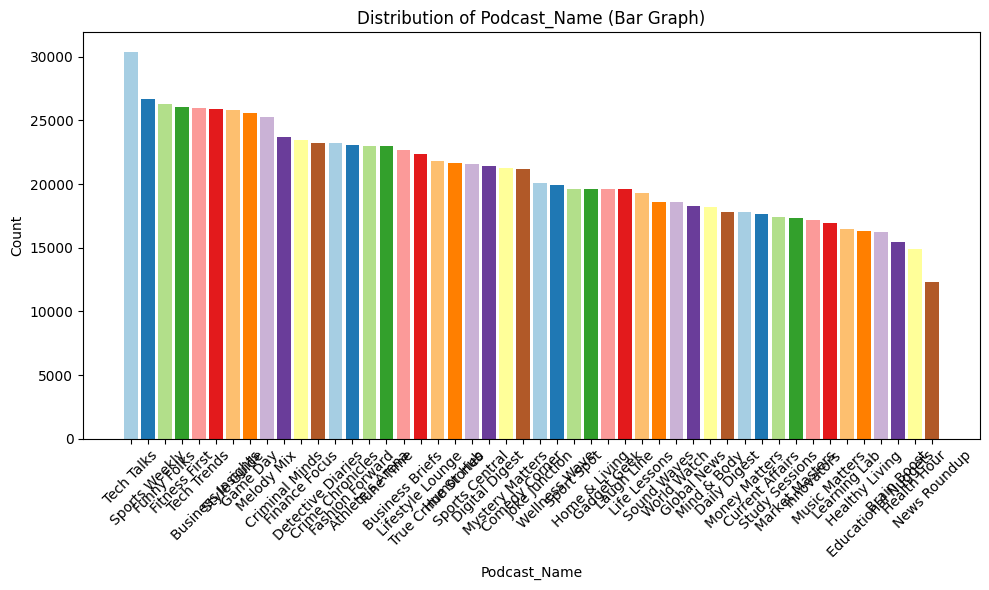

Statistics for Podcast_Name:
Number of Unique Values: 48
Missing Values in Podcast_Name: 0


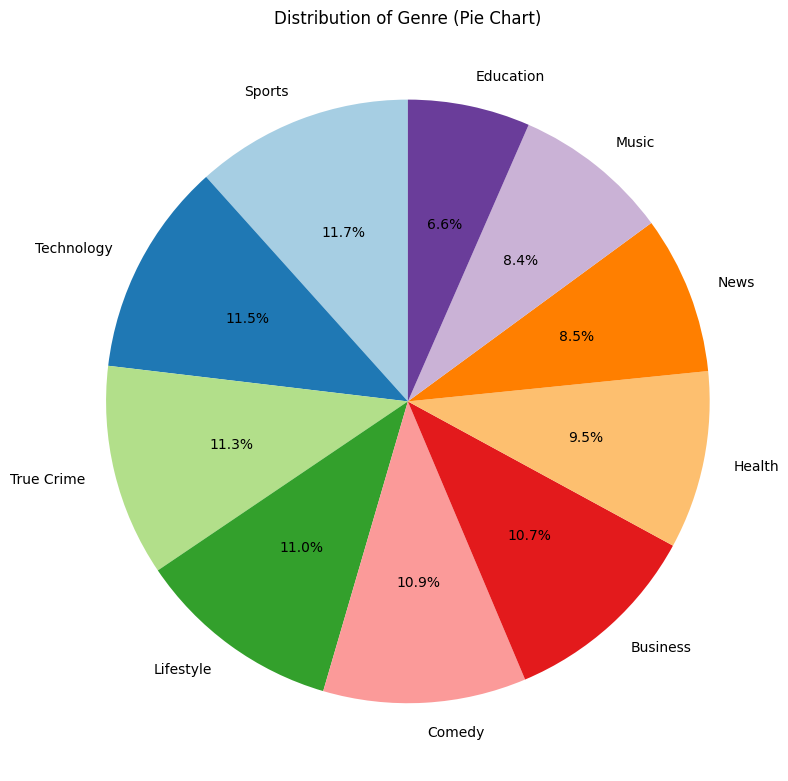

Statistics for Genre:
Number of Unique Values: 10
Missing Values in Genre: 0


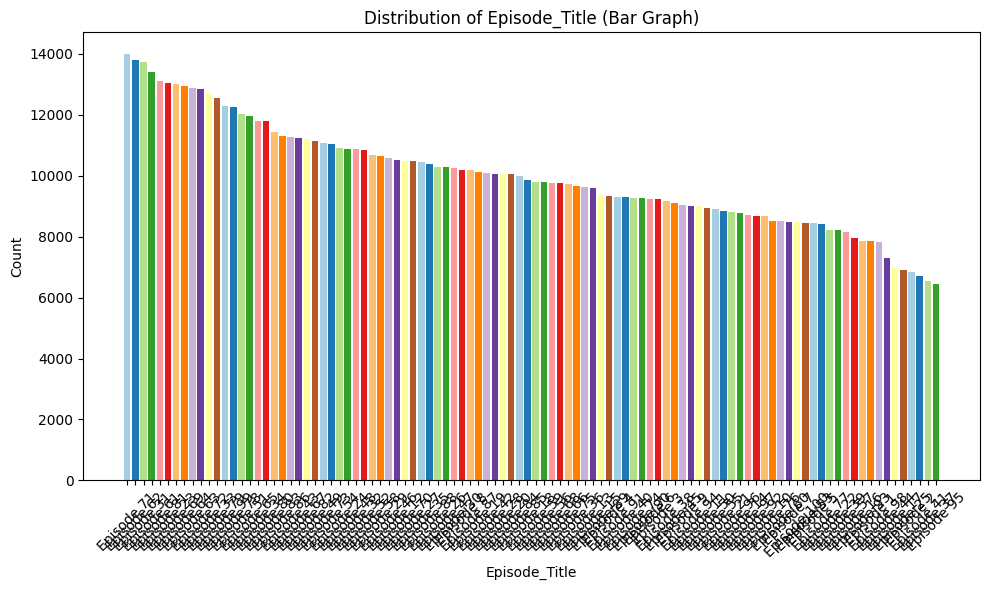

Statistics for Episode_Title:
Number of Unique Values: 100
Missing Values in Episode_Title: 0


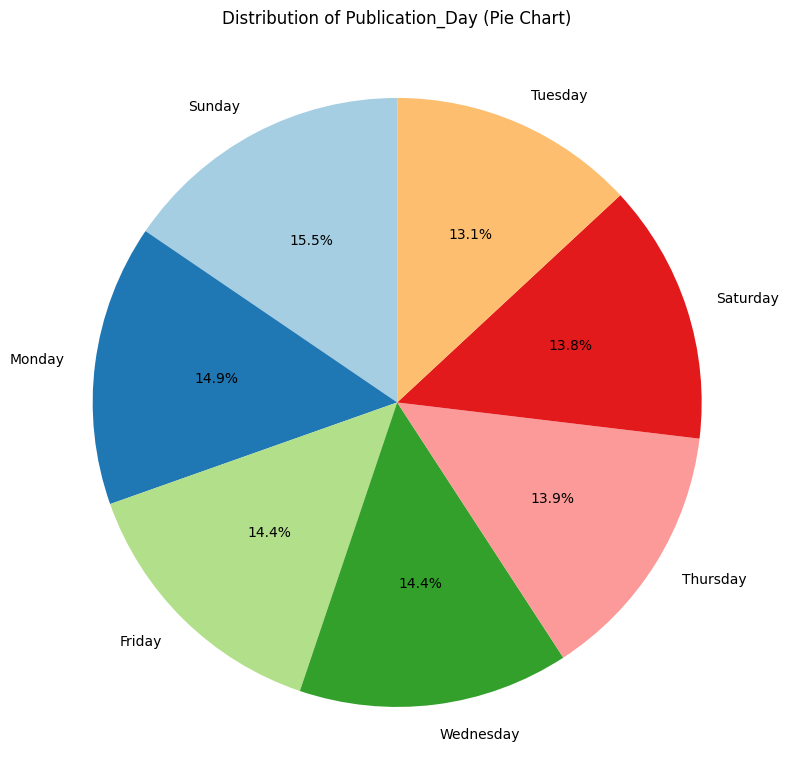

Statistics for Publication_Day:
Number of Unique Values: 7
Missing Values in Publication_Day: 0


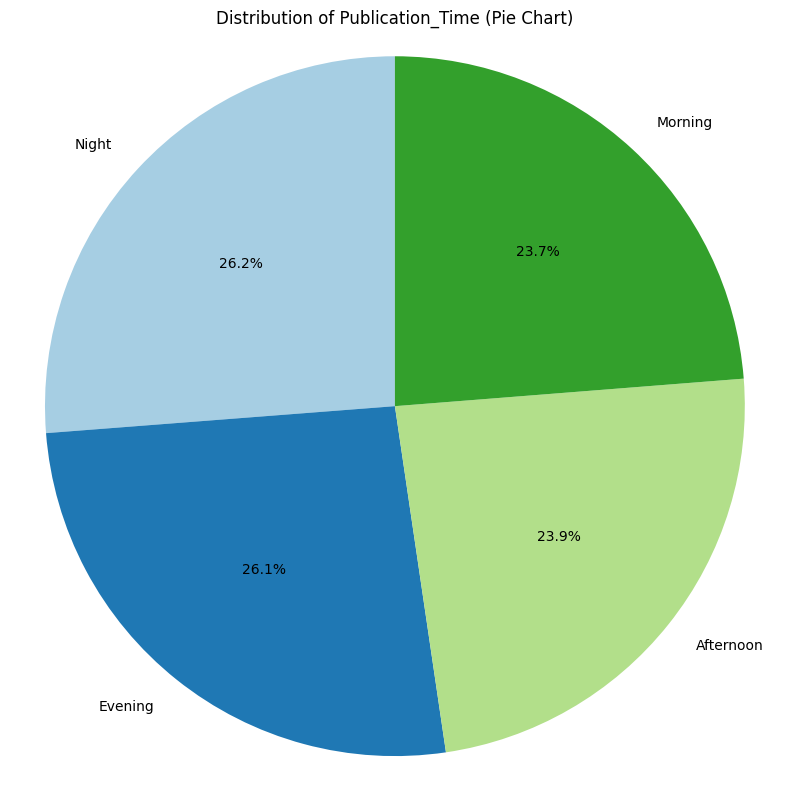

Statistics for Publication_Time:
Number of Unique Values: 4
Missing Values in Publication_Time: 0


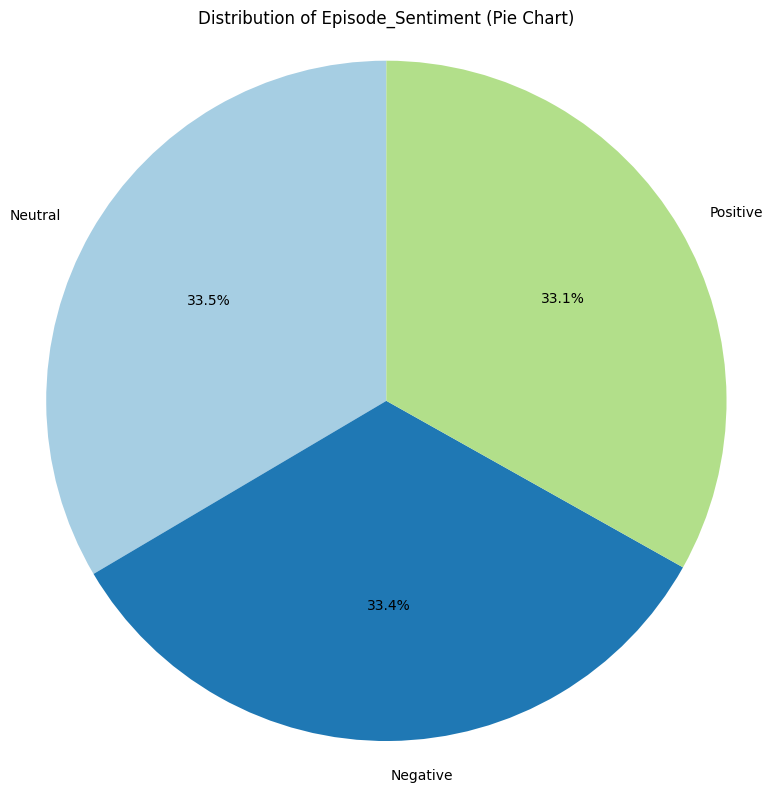

Statistics for Episode_Sentiment:
Number of Unique Values: 3
Missing Values in Episode_Sentiment: 0


In [11]:
plot_categorical_features(data, Non_Numeric_Cols)

* Y-Variable vs Categorical Columns

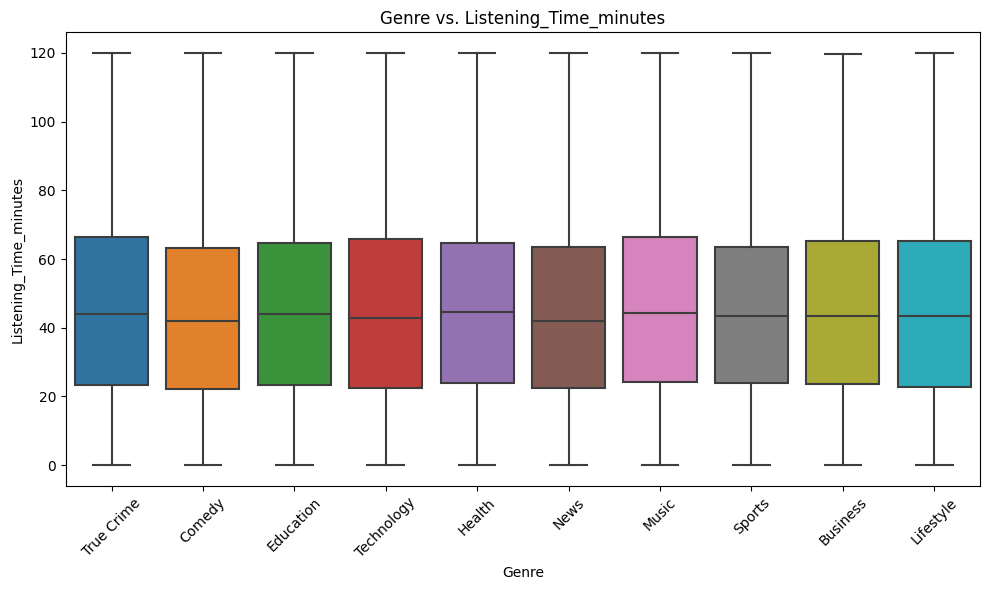

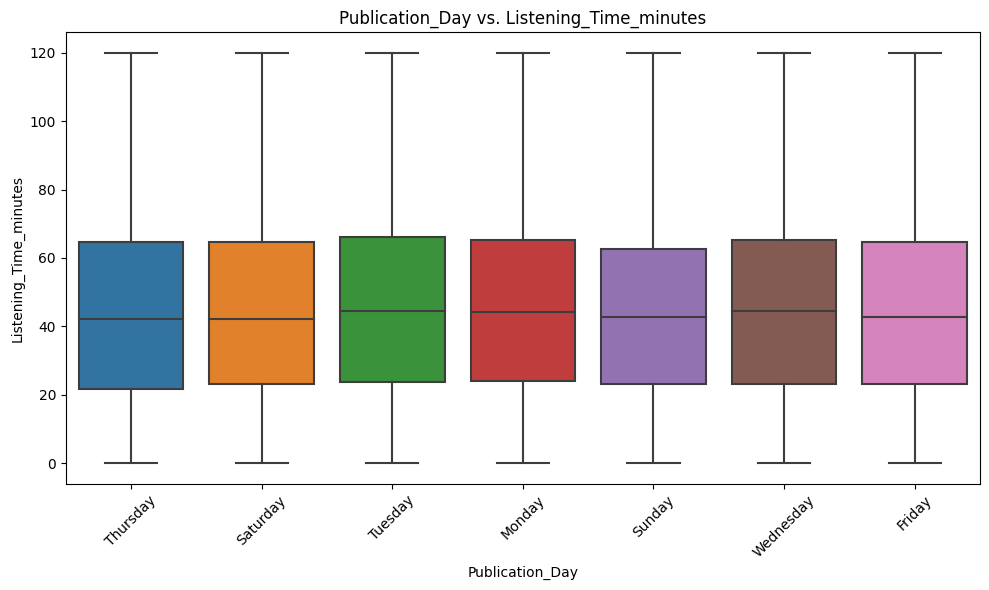

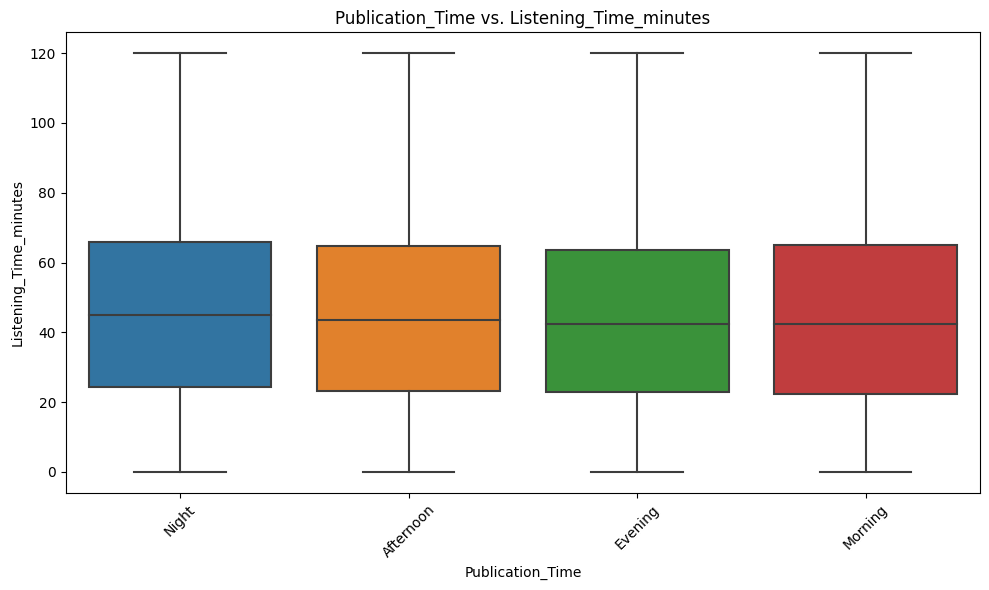

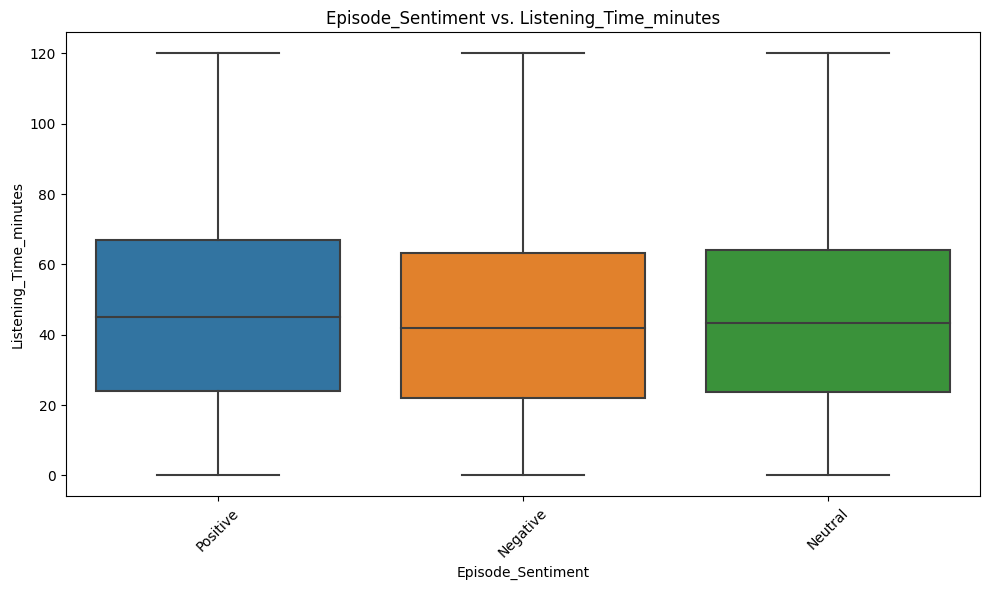

In [12]:
plot_categorical_boxplots(data, Non_Numeric_Cols, "Listening_Time_minutes")

* Univariate Analysis for Numeric Columns

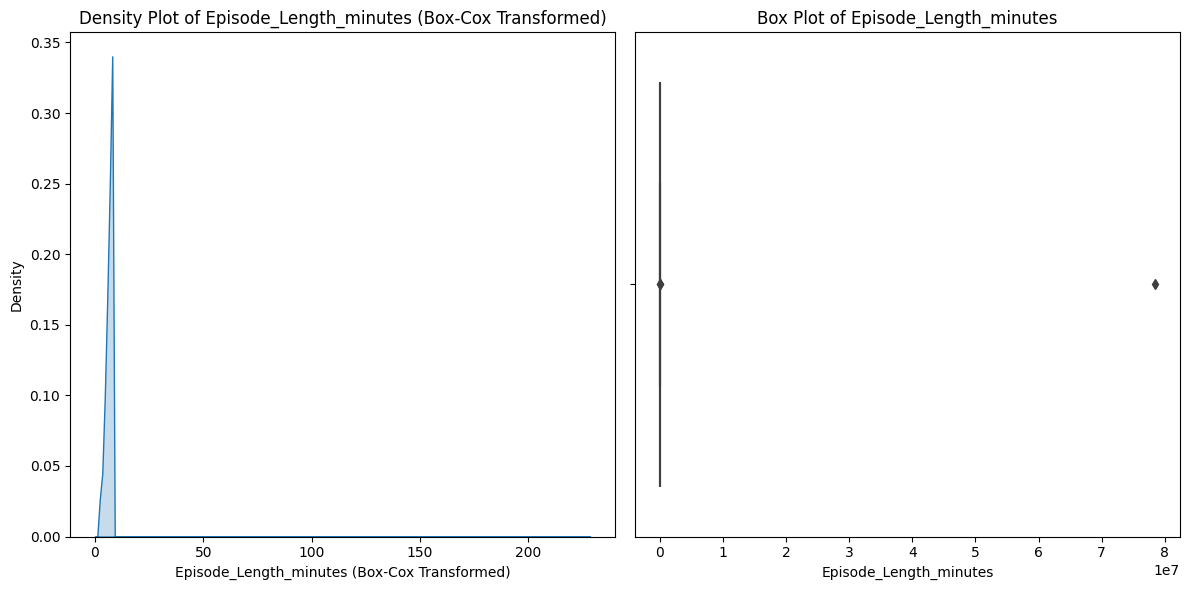


Statistics for Episode_Length_minutes:
Skewness: 940.30
Number of Missing Values: 115829


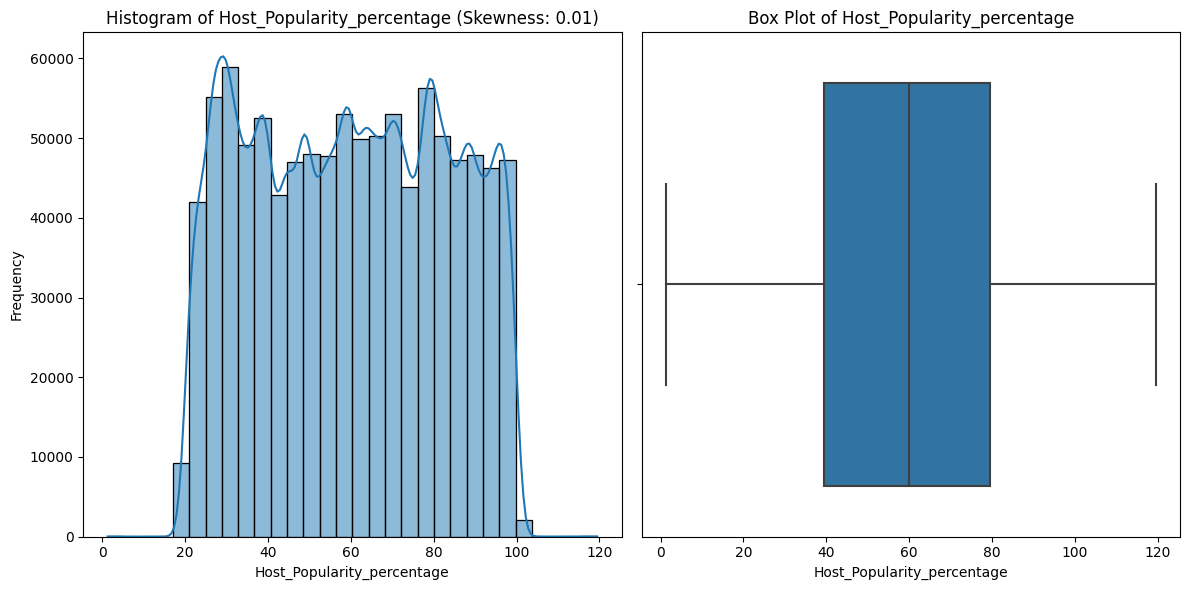


Statistics for Host_Popularity_percentage:
Skewness: 0.01
Number of Missing Values: 0


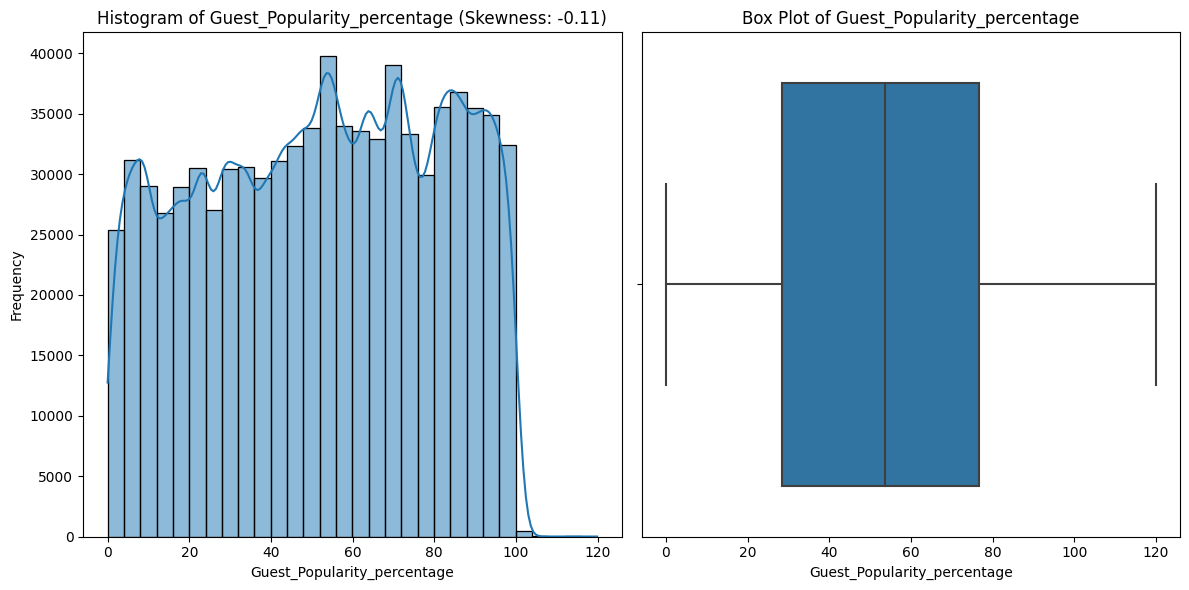


Statistics for Guest_Popularity_percentage:
Skewness: -0.11
Number of Missing Values: 194862


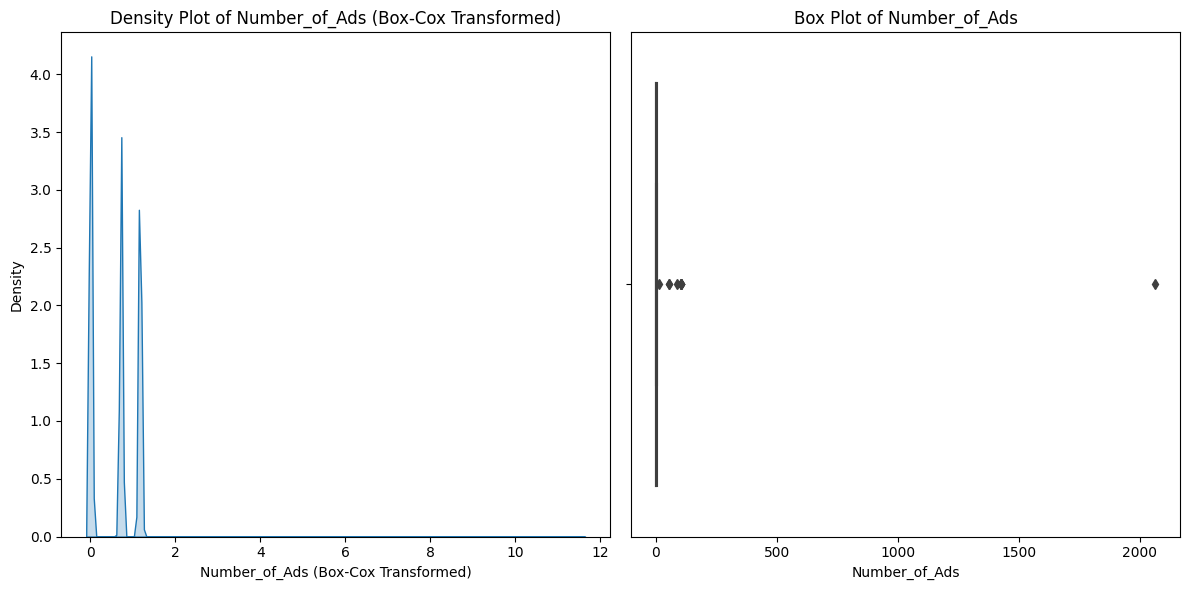


Statistics for Number_of_Ads:
Skewness: 668.72
Number of Missing Values: 0


In [13]:
plot_numeric_features(data, Numeric_Cols, apply_box_cox=True)

* Correlation HeatMaps For Numeric Columns

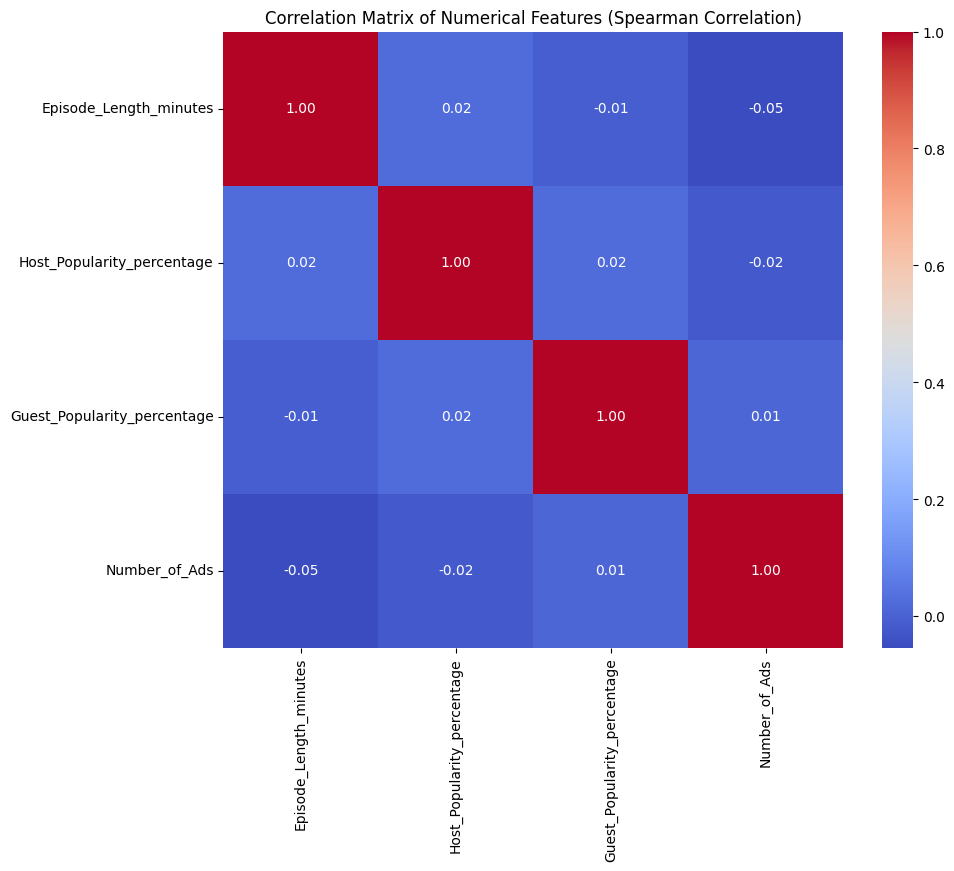

In [14]:
plot_correlation_heatmap(data, Numeric_Cols, corr_type="spearman")

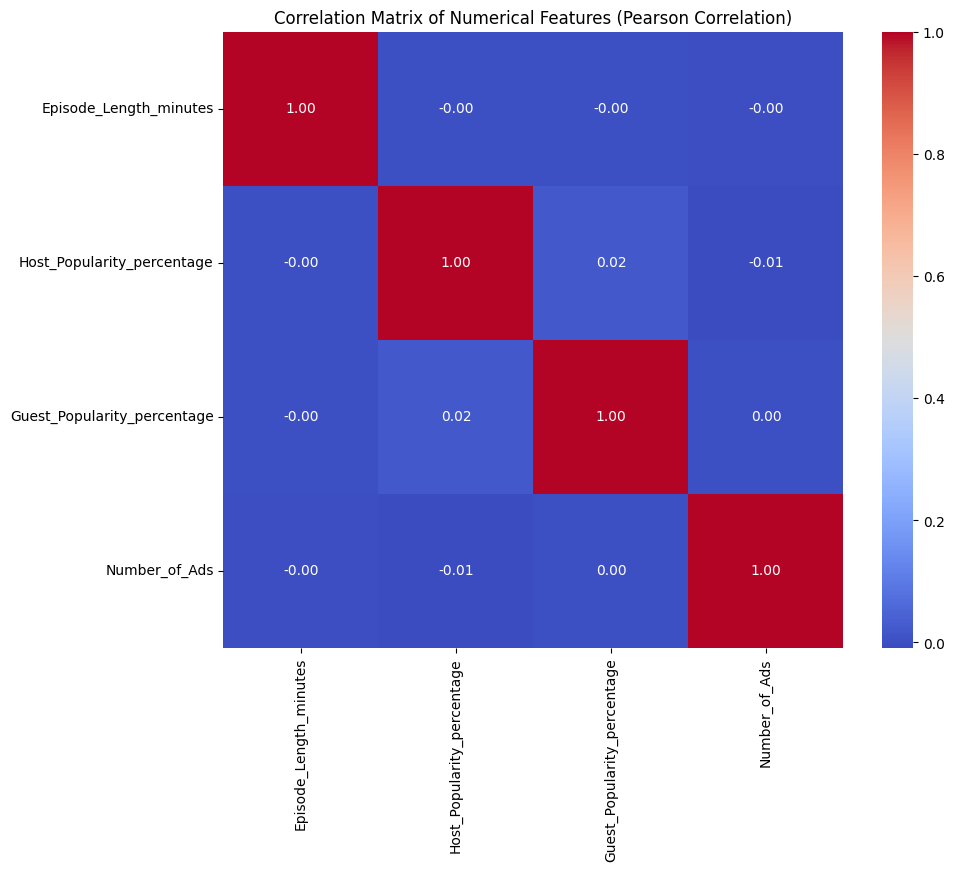

In [15]:
plot_correlation_heatmap(data, Numeric_Cols, corr_type="pearson")

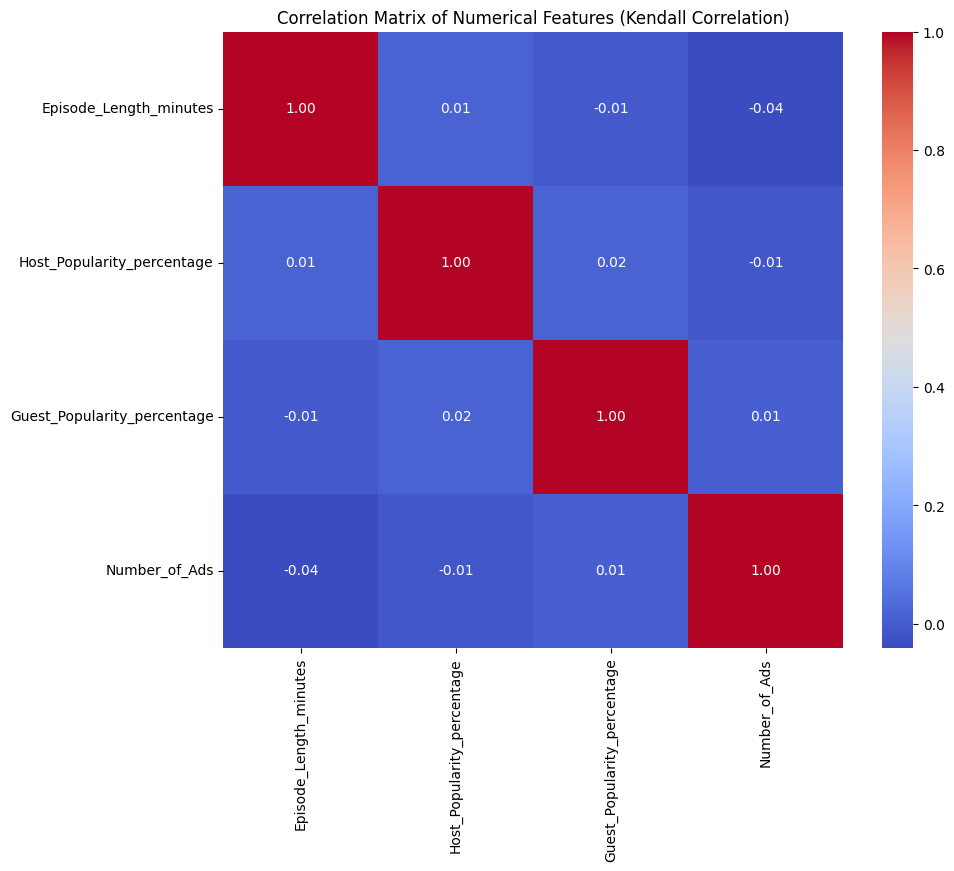

In [16]:
plot_correlation_heatmap(data, Numeric_Cols, corr_type="kendall")

* Y-Variable vs Numeric with Information Values

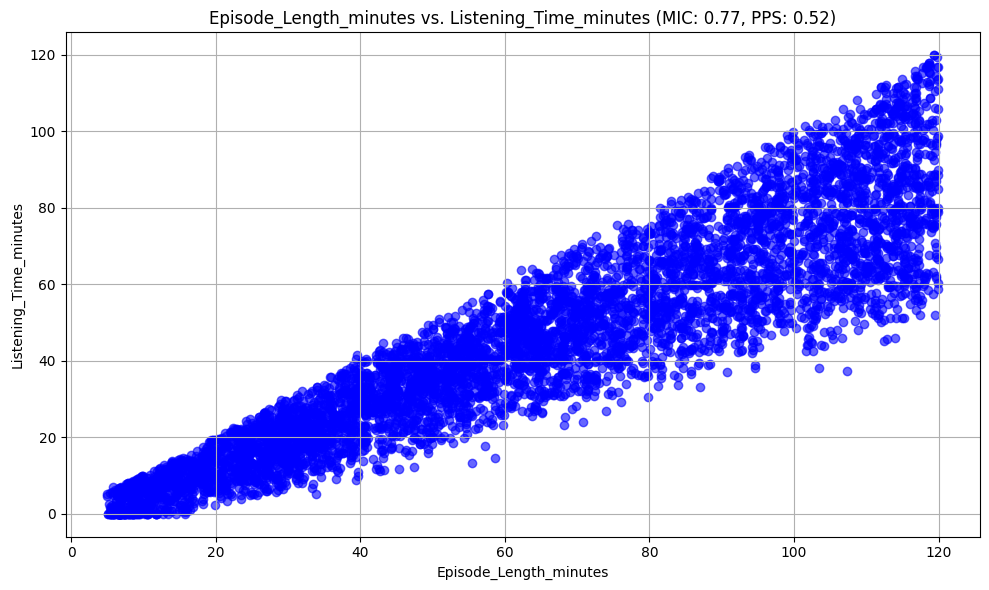

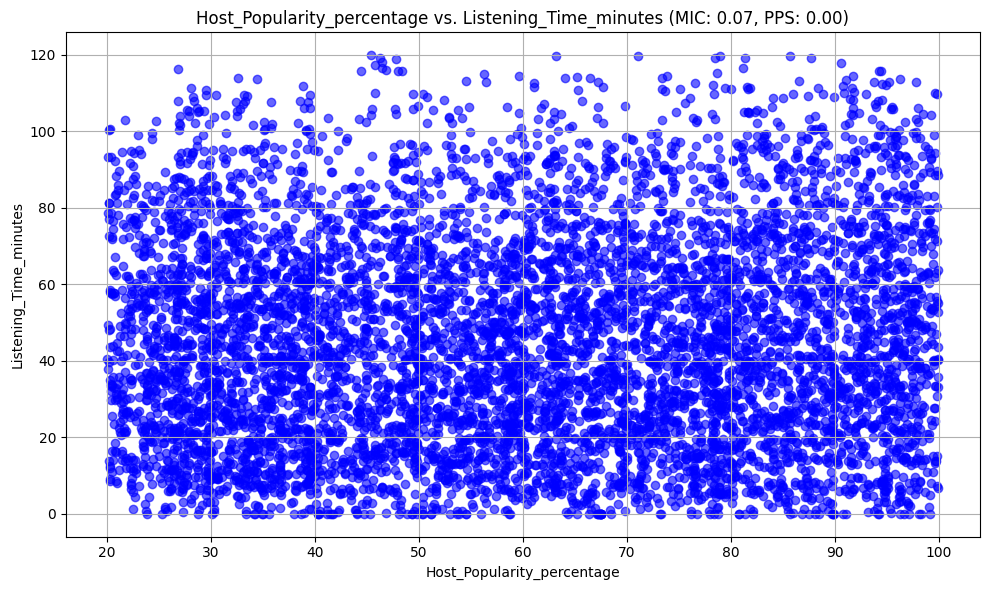

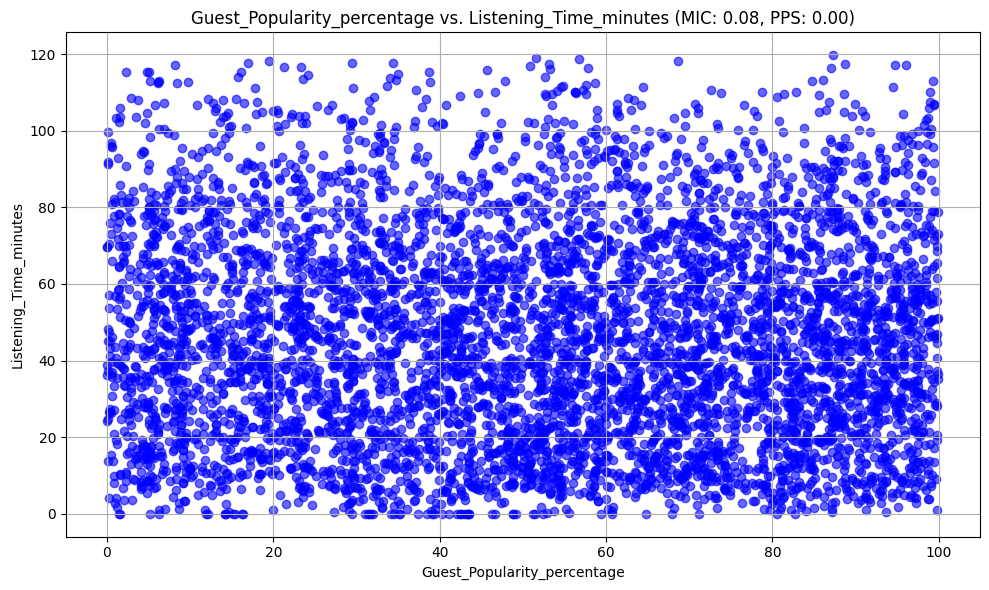

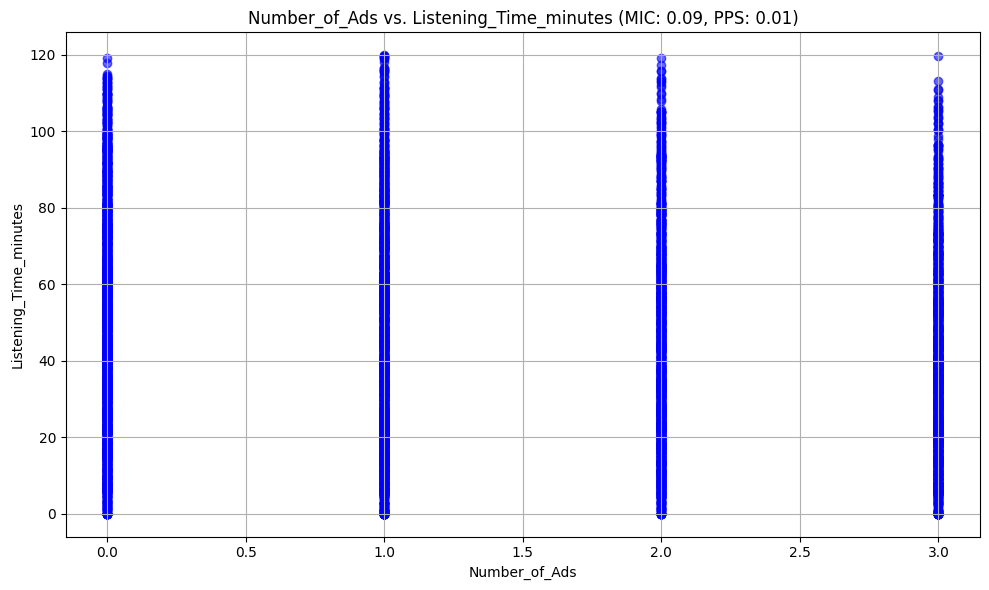

In [17]:
plot_numeric_analysis_with_sampling(data, Numeric_Cols, "Listening_Time_minutes", sample=0.01)

* Clearly Number of Ads has to be in Categoric Features, but still has more MIC in raw form than Guest and Host Popularity. Next we Factorize the Categoric Columns to Numeric Ones. 

* Pair-wise Numeric Distributions vs Any Categoric Column

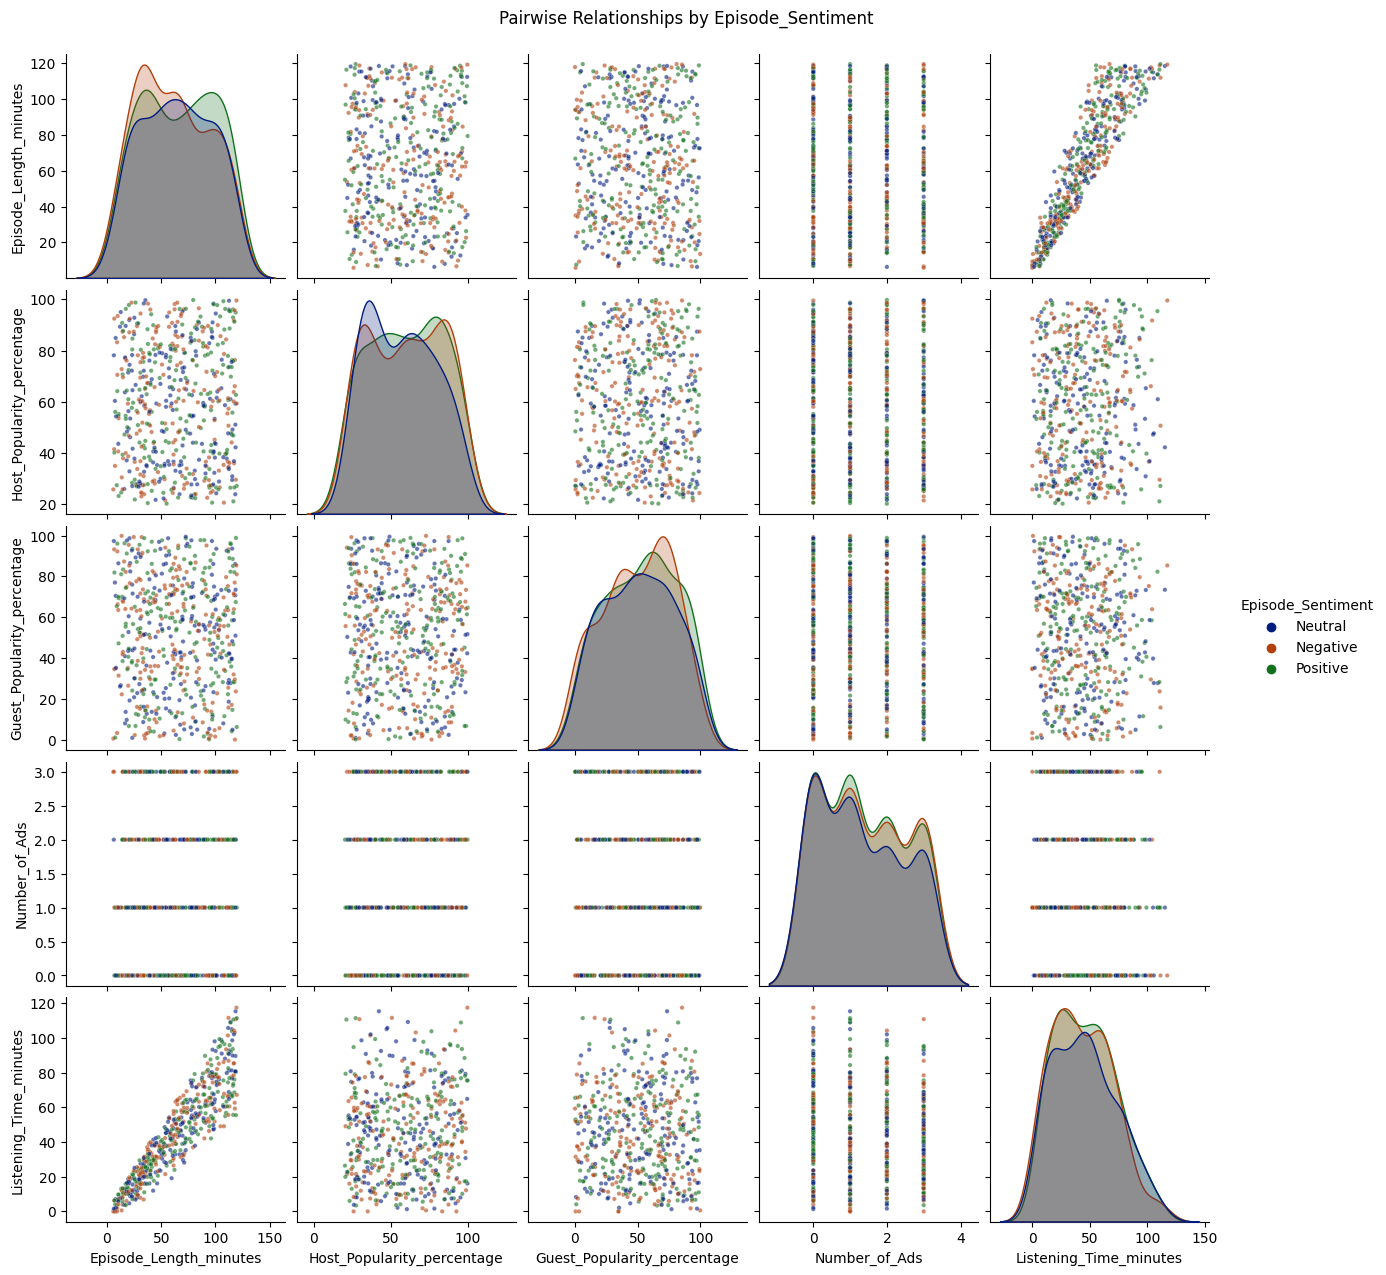

In [18]:
generate_pair_plot_for_numeric_columns(data, Numeric_Cols+["Listening_Time_minutes","Episode_Sentiment"], hue='Episode_Sentiment', sample_size=1000)

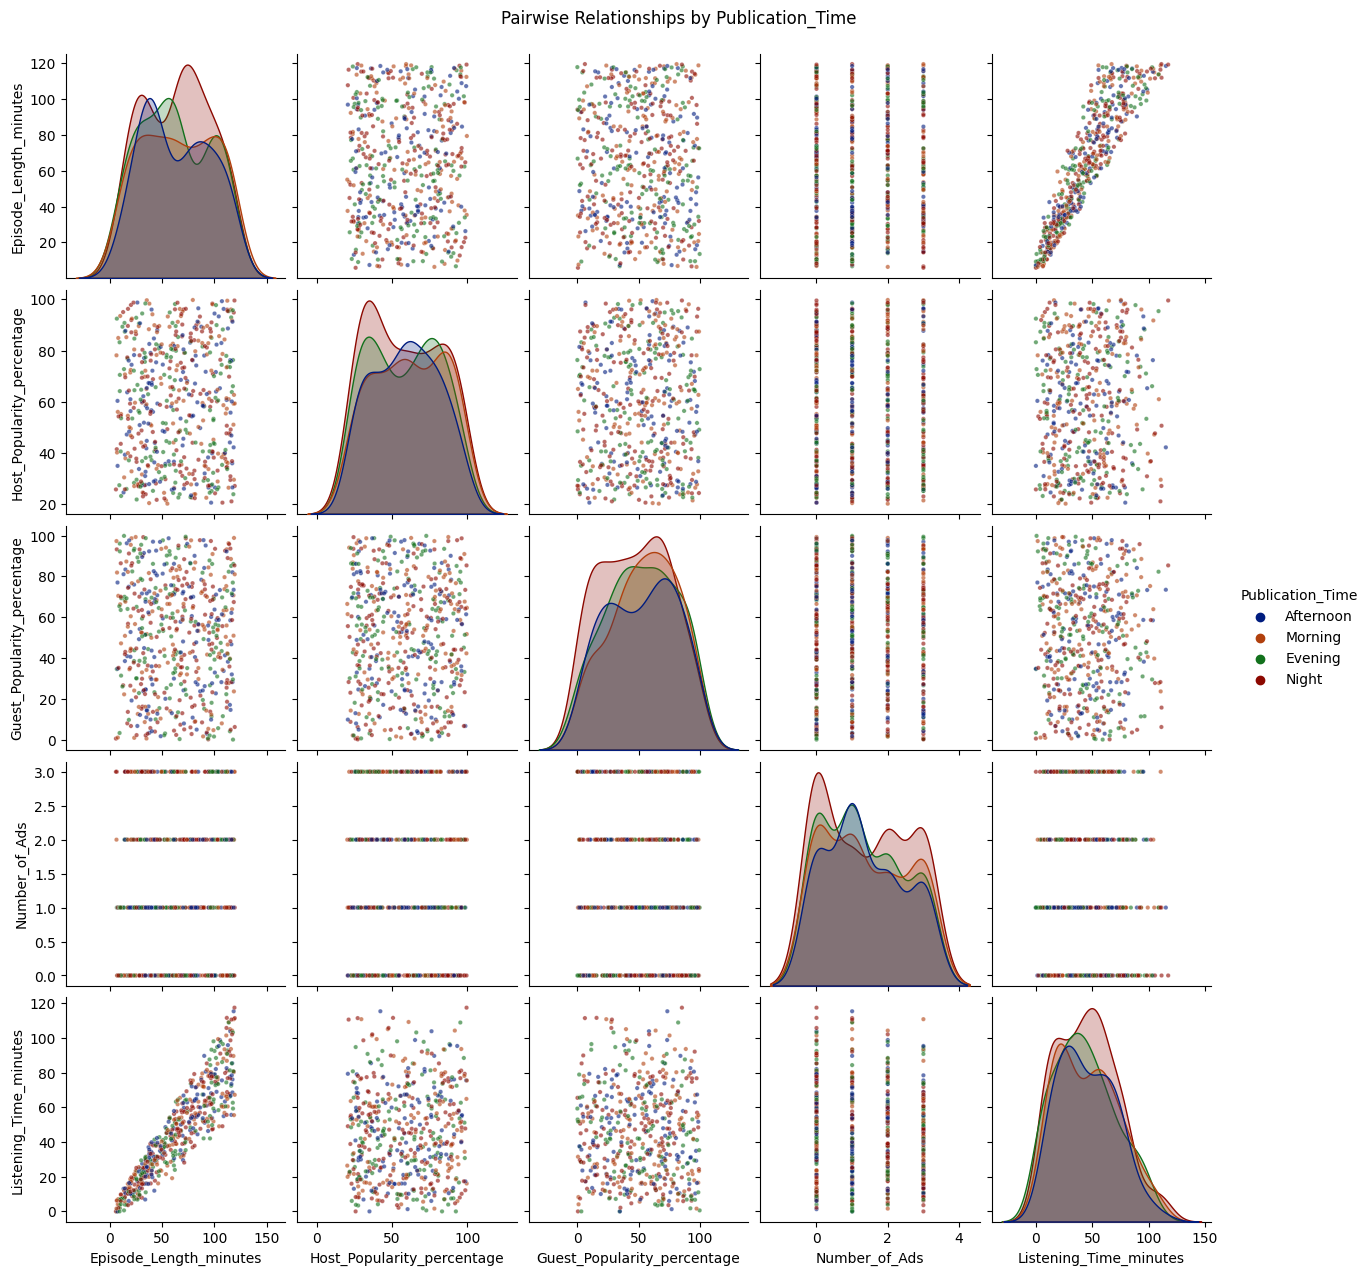

In [19]:
generate_pair_plot_for_numeric_columns(data, Numeric_Cols+["Listening_Time_minutes","Publication_Time"], hue='Publication_Time', sample_size=1000)

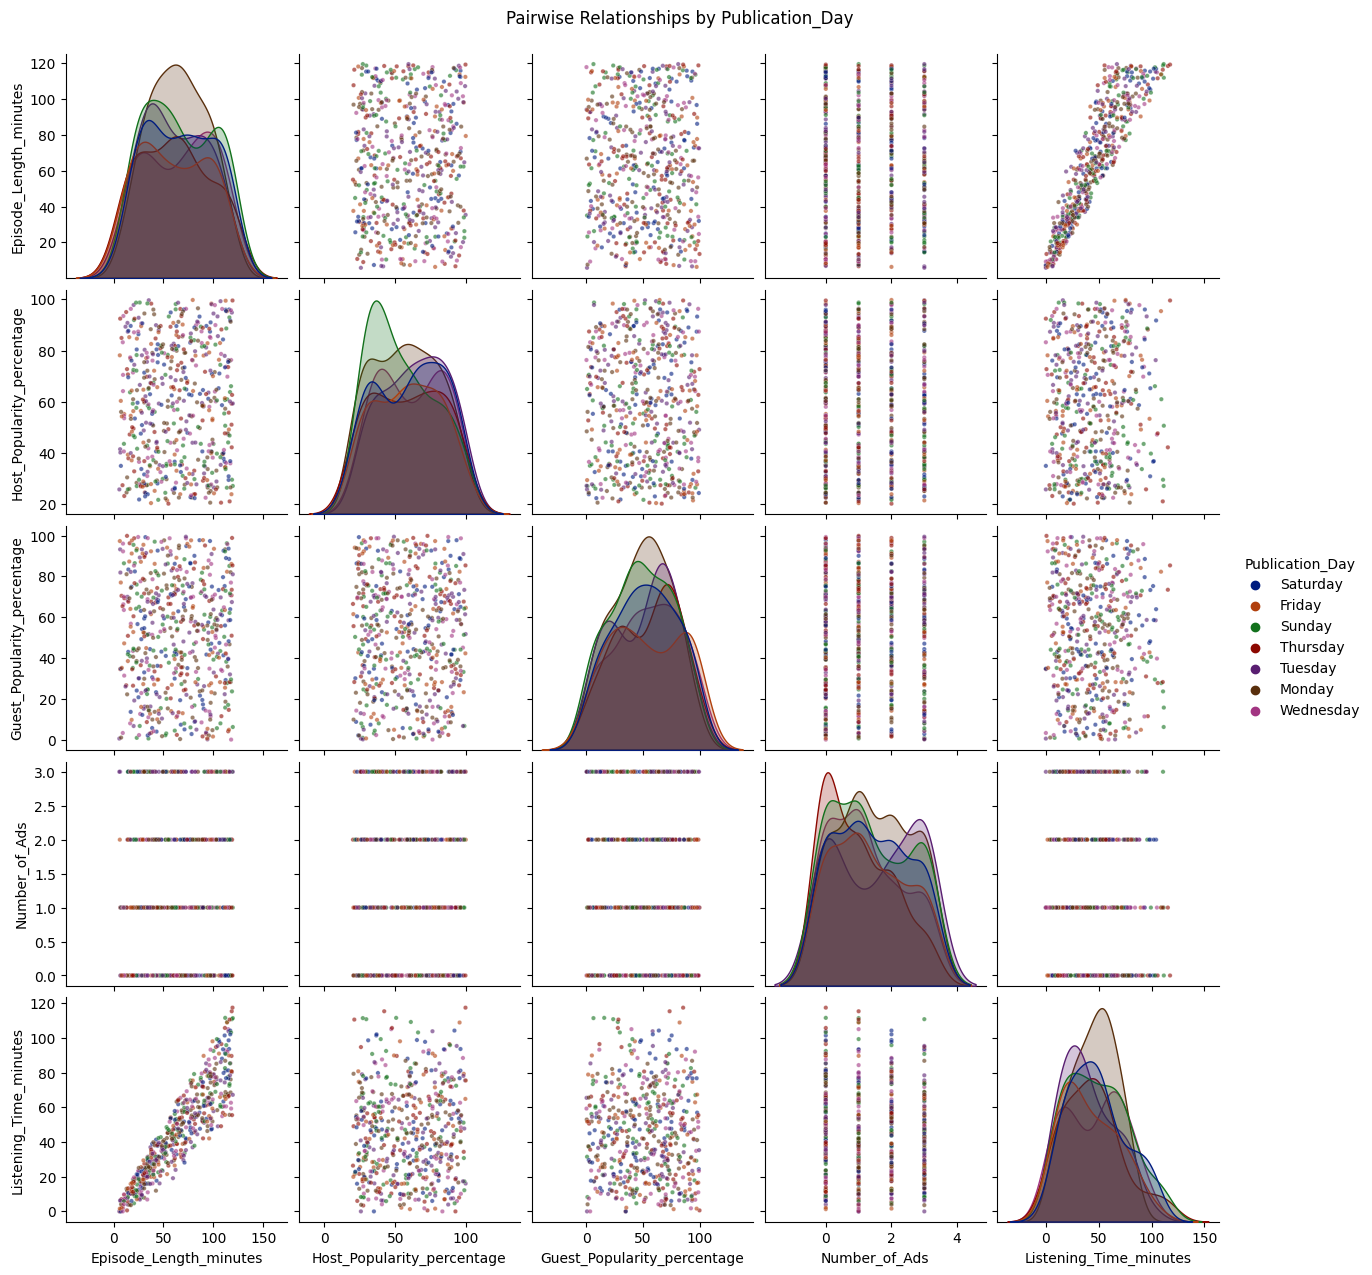

In [20]:
generate_pair_plot_for_numeric_columns(data, Numeric_Cols+["Listening_Time_minutes","Publication_Day"], hue='Publication_Day', sample_size=1000)

* Density Plots for Numeric Columns

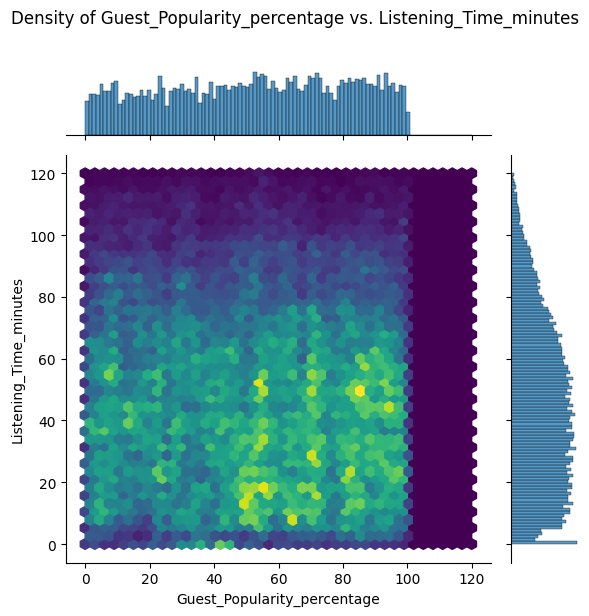

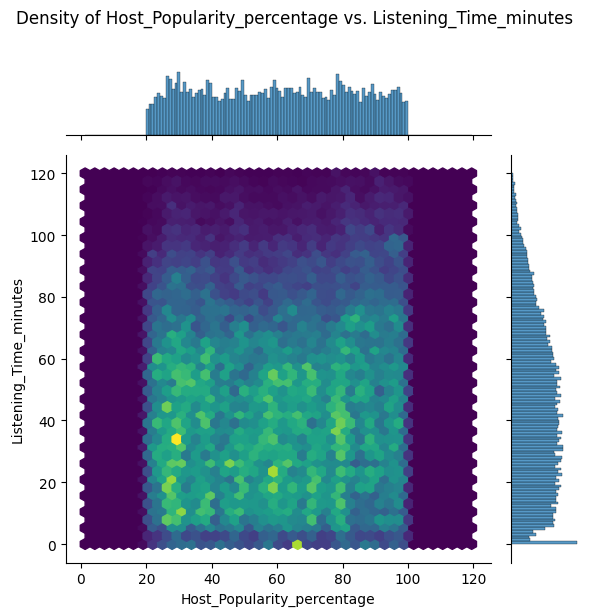

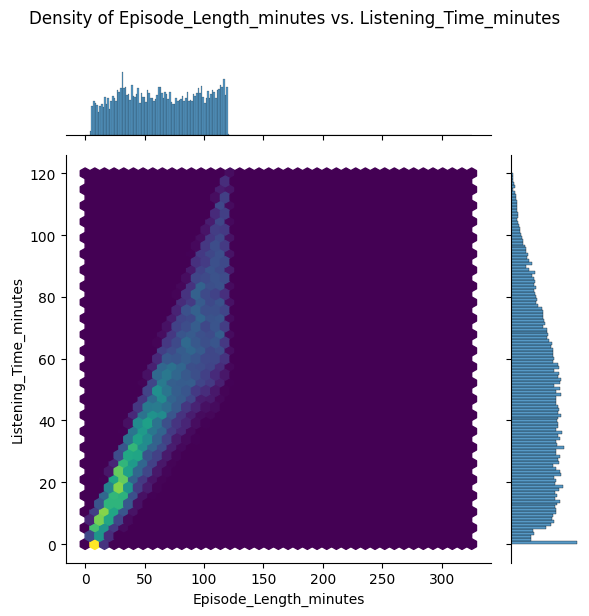

In [21]:
Numeric_Cols2 = ['Guest_Popularity_percentage', 'Host_Popularity_percentage', 'Episode_Length_minutes']
plot_numeric_vs_target_density(data, Numeric_Cols2, 'Listening_Time_minutes')

* 2 Category vs Y-Variable

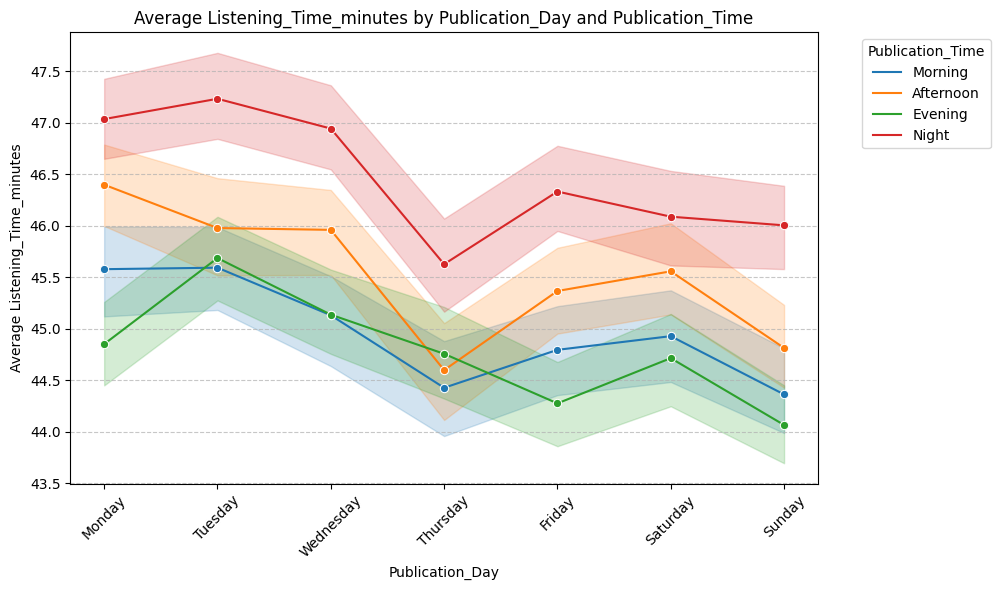

In [22]:
generate_categorical_numeric_plot(
    df=data,
    cat_col1='Publication_Day',
    cat_col2='Publication_Time',
    numeric_col='Listening_Time_minutes',
    cat1_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    cat2_order=['Morning', 'Afternoon', 'Evening', 'Night']
)

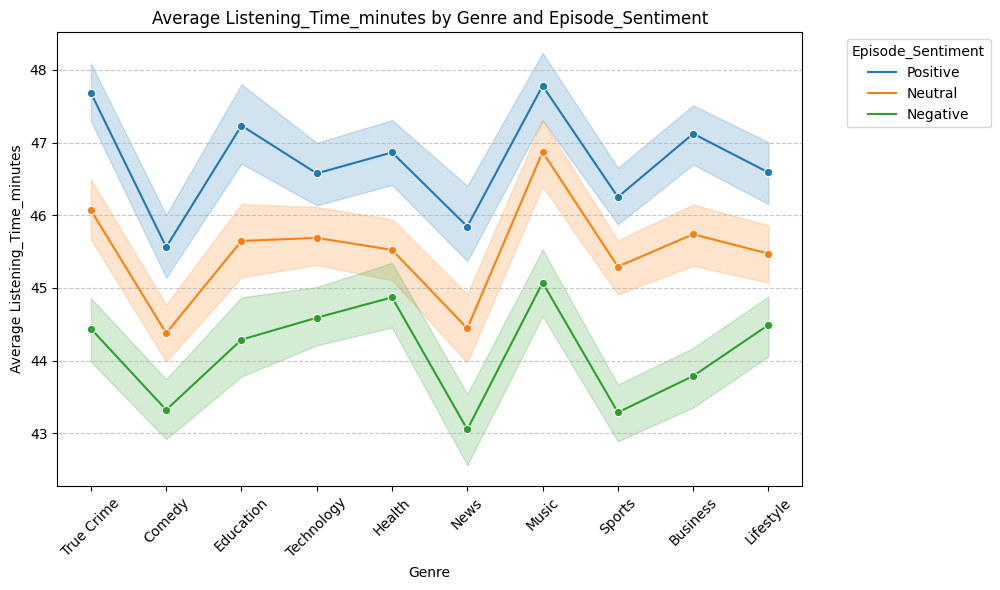

In [23]:
generate_categorical_numeric_plot(
    df=data,
    cat_col1='Genre',
    cat_col2='Episode_Sentiment',
    numeric_col='Listening_Time_minutes',
    cat1_order=list(data.Genre.unique()),
    cat2_order=['Positive','Neutral','Negative']
)

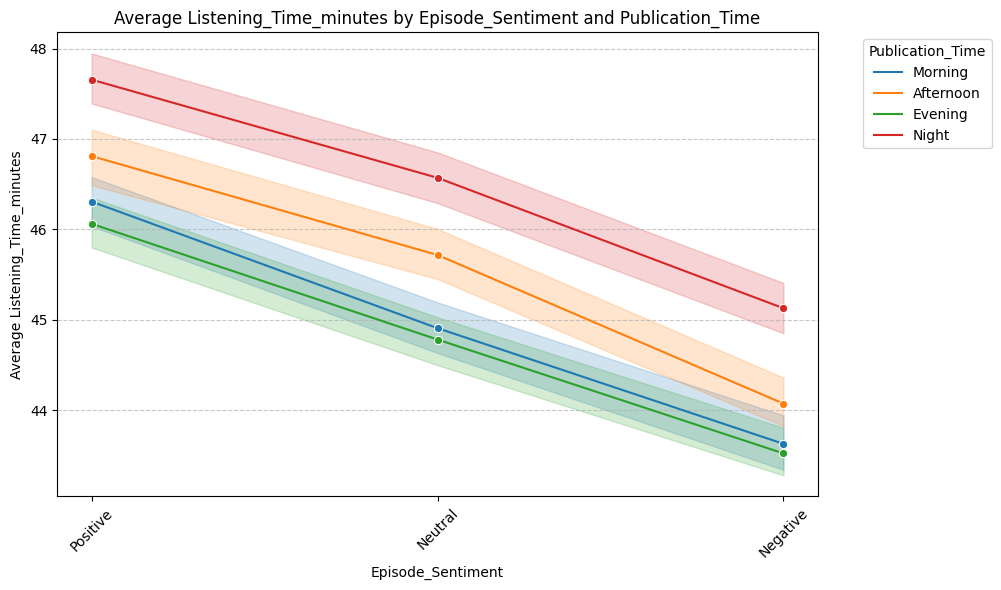

In [24]:
generate_categorical_numeric_plot(
    df=data,
    cat_col1='Episode_Sentiment',
    cat_col2='Publication_Time',
    numeric_col='Listening_Time_minutes',
    cat1_order=['Positive','Neutral','Negative'],
    cat2_order=['Morning', 'Afternoon', 'Evening', 'Night']
)

## 4.c. Basic Feature Transformation & Engineering Before Missing Data Inputaion 

In [25]:
def convert_categorical_to_integers(dataframe, categorical_columns):
    category_mapping = {}
    
    for column in categorical_columns:
        # Generate mapping for categorical values to integers
        unique_categories = dataframe[column].unique()
        mapping = {category: idx for idx, category in enumerate(unique_categories)}
        category_mapping[column] = mapping
        
        # Replace categorical values with integers in the dataframe
        dataframe[column] = dataframe[column].map(mapping)
    
    return dataframe, category_mapping

In [26]:
categorical_cols = ['Podcast_Name','Genre','Publication_Day','Publication_Time','Episode_Sentiment']
# Convert categorical columns
new_df, mapping_dict = convert_categorical_to_integers(data, categorical_cols)

In [27]:
mapping_dict

{'Podcast_Name': {'Mystery Matters': 0,
  'Joke Junction': 1,
  'Study Sessions': 2,
  'Digital Digest': 3,
  'Mind & Body': 4,
  'Fitness First': 5,
  'Criminal Minds': 6,
  'News Roundup': 7,
  'Daily Digest': 8,
  'Music Matters': 9,
  'Sports Central': 10,
  'Melody Mix': 11,
  'Game Day': 12,
  'Gadget Geek': 13,
  'Global News': 14,
  'Tech Talks': 15,
  'Sport Spot': 16,
  'Funny Folks': 17,
  'Sports Weekly': 18,
  'Business Briefs': 19,
  'Tech Trends': 20,
  'Innovators': 21,
  'Health Hour': 22,
  'Comedy Corner': 23,
  'Sound Waves': 24,
  'Brain Boost': 25,
  "Athlete's Arena": 26,
  'Wellness Wave': 27,
  'Style Guide': 28,
  'World Watch': 29,
  'Humor Hub': 30,
  'Money Matters': 31,
  'Healthy Living': 32,
  'Home & Living': 33,
  'Educational Nuggets': 34,
  'Market Masters': 35,
  'Learning Lab': 36,
  'Lifestyle Lounge': 37,
  'Crime Chronicles': 38,
  'Detective Diaries': 39,
  'Life Lessons': 40,
  'Current Affairs': 41,
  'Finance Focus': 42,
  'Laugh Line': 43,


In [28]:
new_df = new_df[['Podcast_Name','Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day','Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes']]
new_df

Podcast_Name  Episode_Length_minutes Genre  \
0                  0                     NaN     0   
1                  1                  119.80     1   
2                  2                   73.90     2   
3                  3                   67.17     3   
4                  4                  110.51     4   
...              ...                     ...   ...   
999995             4                   21.05     4   
999996             1                   85.50     1   
999997             1                   12.11     1   
999998            35                  113.46     8   
999999            25                   78.05     2   

        Host_Popularity_percentage Publication_Day Publication_Time  \
0                            74.81               0                0   
1                            66.95               1                1   
2                            69.97               2                2   
3                            57.22               3                3   
4                            80.07               3                1   
...                            ...             ...              ...   
999995                       65.77               1                2   
999996                       41.47               1                0   
999997                       25.92               0                2   
999998                       43.47               6                0   
999999                       41.72               6                3   

        Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
0                               NaN            0.0                 0   
1                             75.95            2.0                 1   
2                              8.97            0.0                 1   
3                             78.70            2.0                 0   
4                             58.68            3.0                 2   
...                             ...            ...               ...   
999995                        96.40            3.0                 1   
999996                        30.52            2.0                 1   
999997                        73.69            1.0                 2   
999998                        93.59            3.0                 0   
999999                        50.77            0.0                 1   

        Listening_Time_minutes  
0                     31.41998  
1                     88.01241  
2                     44.92531  
3                     46.27824  
4                     75.61031  
...                        ...  
999995                     NaN  
999996                     NaN  
999997                     NaN  
999998                     NaN  
999999                     NaN  

[1000000 rows x 10 columns]

In [29]:
def fill_missing_with_group_option(df, group_cols, target_col, option="mean"):
    """
    Groups by the specified columns and fills missing values in the target column
    based on the provided option. Ensures no NA values remain by filling any 
    leftover missing values with the overall column's statistic (mean, median, or mode).

    Parameters:
        df (pd.DataFrame): The input dataframe.
        group_cols (list): List of columns to group by.
        target_col (str): The target column to fill missing values.
        option (str): Method to fill missing values, options are 'mean', 'median', 'mode'.

    Returns:
        pd.DataFrame: A dataframe with missing values in the target column filled.
    """
    if option not in ["mean", "median", "mode"]:
        raise ValueError("Option must be one of ['mean', 'median', 'mode']")
    
    def fill_func(group):
        if option == "mean":
            return group[target_col].fillna(group[target_col].mean())
        elif option == "median":
            return group[target_col].fillna(group[target_col].median())
        elif option == "mode":
            mode_val = group[target_col].mode()
            if not mode_val.empty:
                return group[target_col].fillna(mode_val[0])
            return group[target_col]  # No changes if mode doesn't exist
        
    # Fill missing values based on group statistics
    df[target_col] = df.groupby(group_cols).apply(fill_func).reset_index(level=group_cols, drop=True)
    
    # Handle remaining missing values with overall column statistic
    if option == "mean":
        df[target_col] = df[target_col].fillna(df[target_col].mean())
    elif option == "median":
        df[target_col] = df[target_col].fillna(df[target_col].median())
    elif option == "mode":
        mode_val = df[target_col].mode()
        if not mode_val.empty:
            df[target_col] = df[target_col].fillna(mode_val[0])
    
    return df

In [30]:
new_df = fill_missing_with_group_option(new_df,['Podcast_Name','Genre','Publication_Day','Publication_Time'], 'Episode_Length_minutes', option="mean")

In [31]:
new_df['Guest_Popularity_percentage'] = new_df['Guest_Popularity_percentage'].fillna(new_df['Host_Popularity_percentage'])

In [32]:
new_df.head()

Podcast_Name  Episode_Length_minutes Genre  Host_Popularity_percentage  \
0             0               65.552897     0                       74.81   
1             1              119.800000     1                       66.95   
2             2               73.900000     2                       69.97   
3             3               67.170000     3                       57.22   
4             4              110.510000     4                       80.07   

  Publication_Day Publication_Time  Guest_Popularity_percentage  \
0               0                0                        74.81   
1               1                1                        75.95   
2               2                2                         8.97   
3               3                3                        78.70   
4               3                1                        58.68   

   Number_of_Ads Episode_Sentiment  Listening_Time_minutes  
0            0.0                 0                31.41998  
1            2.0                 1                88.01241  
2            0.0                 1                44.92531  
3            2.0                 0                46.27824  
4            3.0                 2                75.61031

In [33]:
MissingData_Cols2 = columns_with_missing_values(new_df)

Missing data columns: ['Listening_Time_minutes']


* Basic Mappings & New Columns

In [34]:
new_df['Host_Guest_Popularity_Ratio'] = new_df['Host_Popularity_percentage'] / (new_df['Guest_Popularity_percentage'] + 1e-5) 
new_df['Ads_Per_Minute'] = new_df['Number_of_Ads'] / (new_df['Episode_Length_minutes'] + 1e-5)
new_df['Popularity_Score'] = (new_df['Host_Popularity_percentage'] + new_df['Guest_Popularity_percentage']) / 2  
new_df['Long_Episode'] = (new_df['Episode_Length_minutes'] > 75).astype(int)
new_df['Highly_Popular_Host'] = (new_df['Host_Popularity_percentage'] > 75).astype(int)
new_df['Highly_Popular_Guest'] = (new_df['Guest_Popularity_percentage'] > 75).astype(int)
new_df['Host_Guest_Popularity_Diff'] = new_df['Host_Popularity_percentage'] - new_df['Guest_Popularity_percentage']
new_df['Host_Guest_Popularity_Sum'] = new_df['Host_Popularity_percentage'] + new_df['Guest_Popularity_percentage']
new_df['Ad_Impact'] = new_df['Number_of_Ads'] * new_df['Episode_Length_minutes']
new_df['Episode_Length_Bin'] = pd.cut(new_df['Episode_Length_minutes'],
                                      bins=[-1, 187500, 375000, 562500, np.inf],
                                      labels=[0, 1, 2, 3])  
new_df['Episode_Length_Bin'] = new_df['Episode_Length_Bin'].astype(int)
new_df['High_Ad_Load'] = (new_df['Number_of_Ads'] > 2).astype(int)

In [35]:
new_df

Podcast_Name  Episode_Length_minutes Genre  \
0                  0               65.552897     0   
1                  1              119.800000     1   
2                  2               73.900000     2   
3                  3               67.170000     3   
4                  4              110.510000     4   
...              ...                     ...   ...   
999995             4               21.050000     4   
999996             1               85.500000     1   
999997             1               12.110000     1   
999998            35              113.460000     8   
999999            25               78.050000     2   

        Host_Popularity_percentage Publication_Day Publication_Time  \
0                            74.81               0                0   
1                            66.95               1                1   
2                            69.97               2                2   
3                            57.22               3                3   
4                            80.07               3                1   
...                            ...             ...              ...   
999995                       65.77               1                2   
999996                       41.47               1                0   
999997                       25.92               0                2   
999998                       43.47               6                0   
999999                       41.72               6                3   

        Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
0                             74.81            0.0                 0   
1                             75.95            2.0                 1   
2                              8.97            0.0                 1   
3                             78.70            2.0                 0   
4                             58.68            3.0                 2   
...                             ...            ...               ...   
999995                        96.40            3.0                 1   
999996                        30.52            2.0                 1   
999997                        73.69            1.0                 2   
999998                        93.59            3.0                 0   
999999                        50.77            0.0                 1   

        Listening_Time_minutes  ...  Ads_Per_Minute  Popularity_Score  \
0                     31.41998  ...        0.000000            74.810   
1                     88.01241  ...        0.016694            71.450   
2                     44.92531  ...        0.000000            39.470   
3                     46.27824  ...        0.029775            67.960   
4                     75.61031  ...        0.027147            69.375   
...                        ...  ...             ...               ...   
999995                     NaN  ...        0.142518            81.085   
999996                     NaN  ...        0.023392            35.995   
999997                     NaN  ...        0.082576            49.805   
999998                     NaN  ...        0.026441            68.530   
999999                     NaN  ...        0.000000            46.245   

        Long_Episode  Highly_Popular_Host  Highly_Popular_Guest  \
0                  0                    0                     0   
1                  1                    0                     1   
2                  0                    0                     0   
3                  0                    0                     1   
4                  1                    1                     0   
...              ...                  ...                   ...   
999995             0                    0                     1   
999996             1                    0                     0   
999997             0                    0                     0   
999998             1                    0                     1   
999999             1       

In [36]:
new_df.to_csv('LabelEncodedRaw.csv', index=False)